### 1. Problem Formulation

From the company's monthly expenses and profit report, investigate:

1) How Marketing expenses impact company's monthly Profit?

2) Predit Profit on future Marketing spending.

### 2. Libraries / Packages

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import linear_model
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import RFE 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics

%matplotlib inline

### 3. Load Data

In [2]:
# Load dataset from sklearn.datasets
bd = load_boston()

In [3]:
# Investigate the keys of the dataset
print(bd.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
bd.data # contains the data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
bd.target # contains house prices

In [8]:
bd.feature_names # contains all features or predictor variables

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
bd.DESCR # contains description of the dataset

In [7]:
# Load the dataset into a Dataframe

# If you want to load csv without DafaFrame including an index column
# df = pd.DataFrame(bd.data, columns = bd.feature_names, index_col = 0)

df = pd.DataFrame(bd.data, columns = bd.feature_names)
# Response variable 'y' (MEDV) is missing.

In [8]:
# Add response variable (MEDV) to the DataFrame
df['MEDV'] = bd.target

In [9]:
#Check the columns of DataFrame
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [168]:
# Save a copy of the DataFrame as csv
df.to_csv(r'housing.csv')

### 4. Data Preprocessing

#### a) Exploratory Data Analysis

##### Number of observations (rows) and features (columns)

In [10]:
# Check the top 5 rows.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Check the bottom 5 rows.
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [18]:
# Print the shape
print(df.shape)

(506, 14)


##### Number of elements (data values) in each feature

In [19]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### Investigate string values in the numerical columns and replace it with zeros

In [58]:
# isnull() method cannot find string values.
#Check the csv file for any string values other than NaN or NA

##### Investigate null data values in the dataset and replace it with zeros

In [20]:
# Null values = missing values or invalid values like Not a Number (NaN).
df.isnull().sum()
# No null value in the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [28]:
# If there's Null value in any column, replace it with zeros.
# df = df.fillna(0)

In [ ]:
# Check weather Null values have been replaced with zeroes.
# df.isnull().sum()

##### Investigate zeroes in the dataset ane replace it with mean, mode or median

In [11]:
# Investigate whether zeroes in the dataset could skew modelling. 
# Zeroes in the column can be replaced by mean, rolling mean, mode, median of
# the respective column.

# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  CRIM  is :  0
Count of zeros in column  ZN  is :  372
Count of zeros in column  INDUS  is :  0
Count of zeros in column  CHAS  is :  471
Count of zeros in column  NOX  is :  0
Count of zeros in column  RM  is :  0
Count of zeros in column  AGE  is :  0
Count of zeros in column  DIS  is :  0
Count of zeros in column  RAD  is :  0
Count of zeros in column  TAX  is :  0
Count of zeros in column  PTRATIO  is :  0
Count of zeros in column  B  is :  0
Count of zeros in column  LSTAT  is :  0
Count of zeros in column  MEDV  is :  0


In [31]:
# Replace each zeroes in columns with the mean value of the respectiv column
# df=df.mask(df==0).fillna(df.mean())

# Here zeroes in'ZN' & 'CHAS' will not be replaced as those values are important
# part of the dataset.

##### Investigate unique values in the dataset

In [12]:
# Query goes through all values in each column, then counts them and then
# lists them.

for column in df:
    unique_values = np.unique(df[column])
    count_unique_values = len(unique_values)
    if count_unique_values < 10:
        print('The number of unique values for features {} :{} -- {}'.format(column, count_unique_values, unique_values))
    else:
        print('The number of unique values for features {} :{}'.format(column, count_unique_values))

The number of unique values for features CRIM :504
The number of unique values for features ZN :26
The number of unique values for features INDUS :76
The number of unique values for features CHAS :2 -- [0. 1.]
The number of unique values for features NOX :81
The number of unique values for features RM :446
The number of unique values for features AGE :356
The number of unique values for features DIS :412
The number of unique values for features RAD :9 -- [ 1.  2.  3.  4.  5.  6.  7.  8. 24.]
The number of unique values for features TAX :66
The number of unique values for features PTRATIO :46
The number of unique values for features B :357
The number of unique values for features LSTAT :455
The number of unique values for features MEDV :229


##### Investigate distribution and relationships

In [ ]:
# Visualize the ALL relationships between datasets passing the whole DataFrame.
# Note: For big data sets, filter the column first.
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

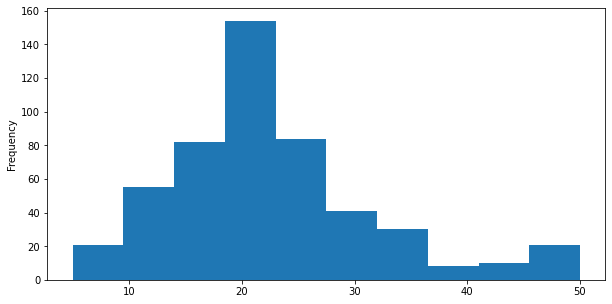

In [26]:
# Visualize histogram for the Response (y) - MEDV
plt.figure(figsize = (10, 5))
df['MEDV'].plot(kind='hist')

#### b) Data Cleaning

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
# Clean outliers from dataset based on the Response variable (y) = 'MEDV'

# Outliers on the lower side of the 'MEDV'
q_low = df['MEDV'].quantile(0.01)

# Outliers on the higher side of the 'MEDV'
q_hi  = df['MEDV'].quantile(0.99)

# Filter the outliers from the 'MEDV'
df_filtered = df[(df['MEDV'] < q_hi) & (df['MEDV'] > q_low)]

df_filtered

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:ylabel='Frequency'>

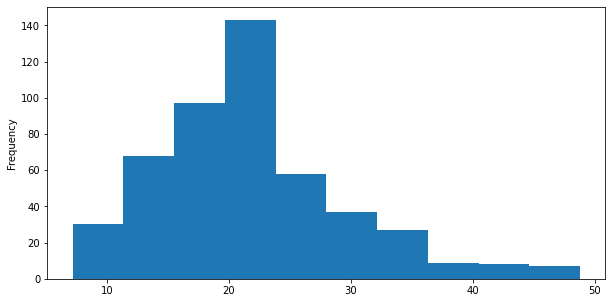

In [15]:
# Visualize histogram again for the Response (y) - MEDV
plt.figure(figsize = (10, 5))
df_filtered['MEDV'].plot(kind='hist')

#### c) Data Aggregation

#### d) Data Join / Merge

#### e) Data Scaling - Normalization / Standardization

#### f) Data Conversion - Numerical / Categorical

#### g) Feature Selection - Correlation / Importance

In [16]:
# Investigate correlation between the Feature (X) and Response variable (y).
cor = df.corr().round(2) # round to two decimal places
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


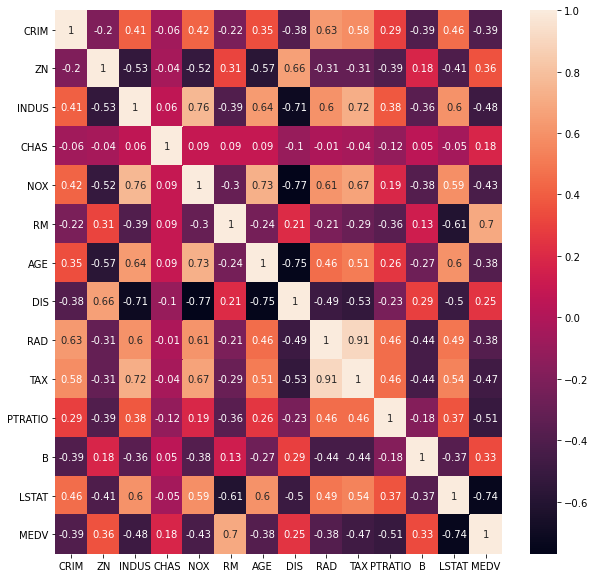

In [17]:
# Investigate correlation in heatmap
fig, ax = plt.subplots(figsize=(10,10))
hm_cor = sns.heatmap(cor, annot = True, annot_kws = {'size' : 10}, ax = ax)

### 5. Select X and y : Hold-out Validation

In [ ]:
# Based on the heatmap above:

# RM (0.7) and LSTAT (-0.74) has the highest correlation with MEDV. They will
# chosen as features (X).

# RAD and TAX have high correlation (0.91). Multi-collinearity issues.
# DIS and AGE also have high correlation (-0.75). Multi-collinearity issues

In [20]:
# Select Response variable 'Prices' (y)
y_select = df_filtered[['MEDV']]
y = y_select.values
y.shape

(484, 1)

Text(0.5, 1.0, 'Visualizing Profit outliers')

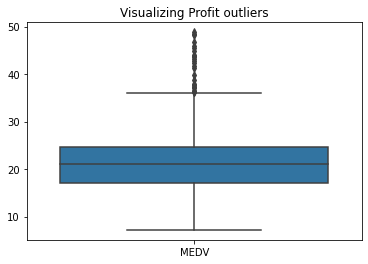

In [21]:
# Visualizing 'Prices' outliers using boxplot
sns.boxplot(data = df_filtered[['MEDV']])
plt.title('Visualizing Profit outliers')

In [210]:
# Select Feature variable 'Marketing Spend' (X)
X_select = df_filtered[['RM', 'LSTAT']]
X = X_select.values
X.shape

(484, 2)

Text(0.5, 1.0, 'Visualizing RM outliers')

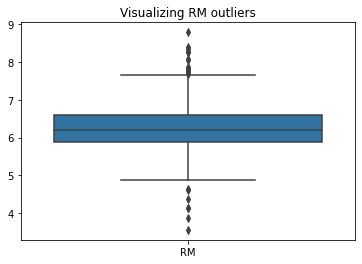

In [23]:
# Visualizing 'RM' outliers using boxplot
sns.boxplot(data = df_filtered[['RM']])
plt.title('Visualizing RM outliers')

Text(0.5, 1.0, 'Visualizing LSTAT outliers')

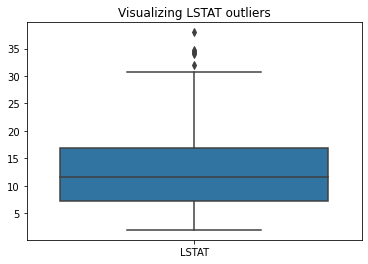

In [24]:
# Visualizing 'LSTAT' outliers using boxplot
sns.boxplot(data = df_filtered[['LSTAT']])
plt.title('Visualizing LSTAT outliers')

Text(0.5, 1.0, 'RM Vs MEDV Scatterplot')

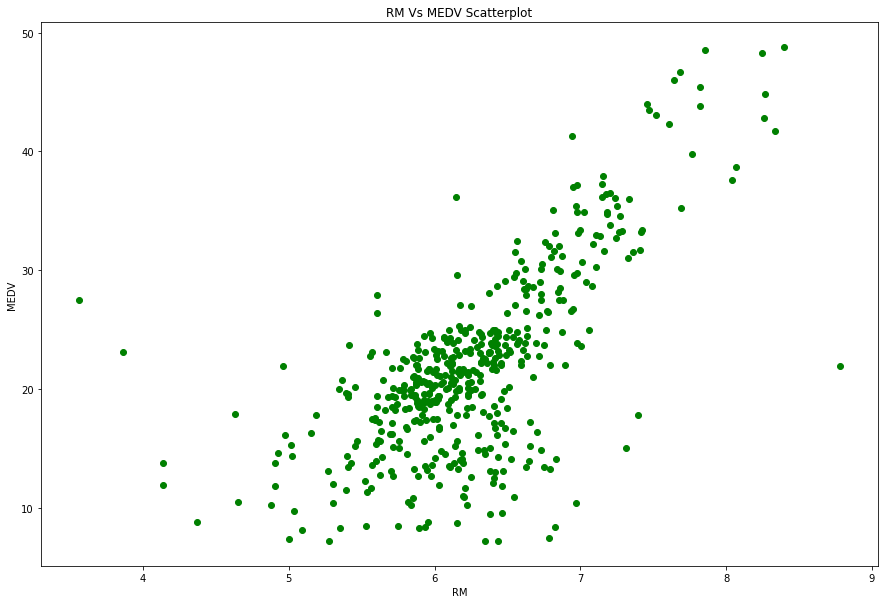

In [25]:
# Visualise RM - MEDV scatterplot
plt.figure(figsize=(15,10))
plt.scatter(df_filtered[['RM']], df_filtered[['MEDV']], c='green')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM Vs MEDV Scatterplot')

#Observation: Prices (MEDV) increases as RM increases. The relationship appears
# almost linear.

Text(0.5, 1.0, 'LSTAT Vs MEDV Scatterplot')

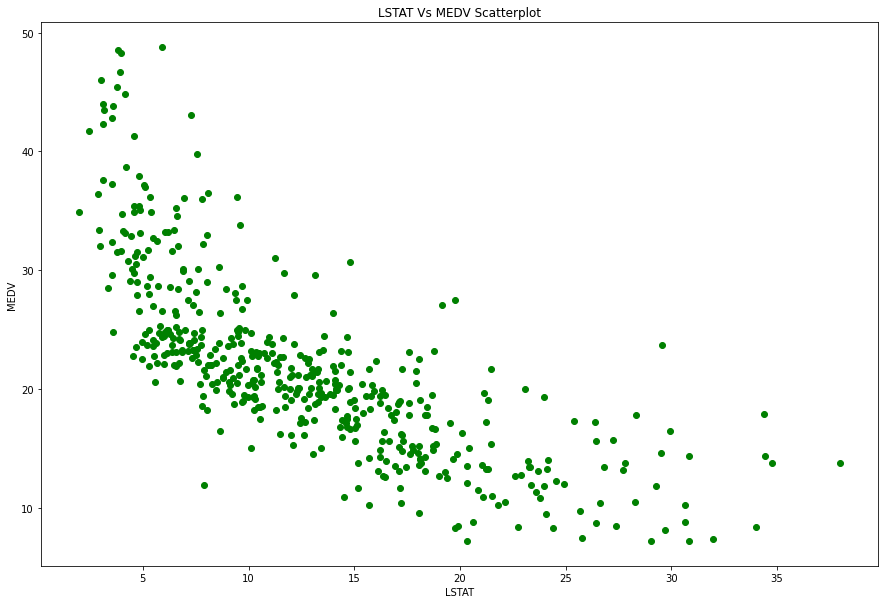

In [26]:
# Visualise LSTAT - MEDV scatterplot
plt.figure(figsize=(15,10))
plt.scatter(df_filtered[['LSTAT']], df_filtered[['MEDV']], c='green')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT Vs MEDV Scatterplot')

#Observation: Prices (MEDV) decreases as LSAT increases. The relationship appears
# quadratic.

Text(0.5, 1.0, 'RM - LSTAT Vs MEDV Scatterplot')

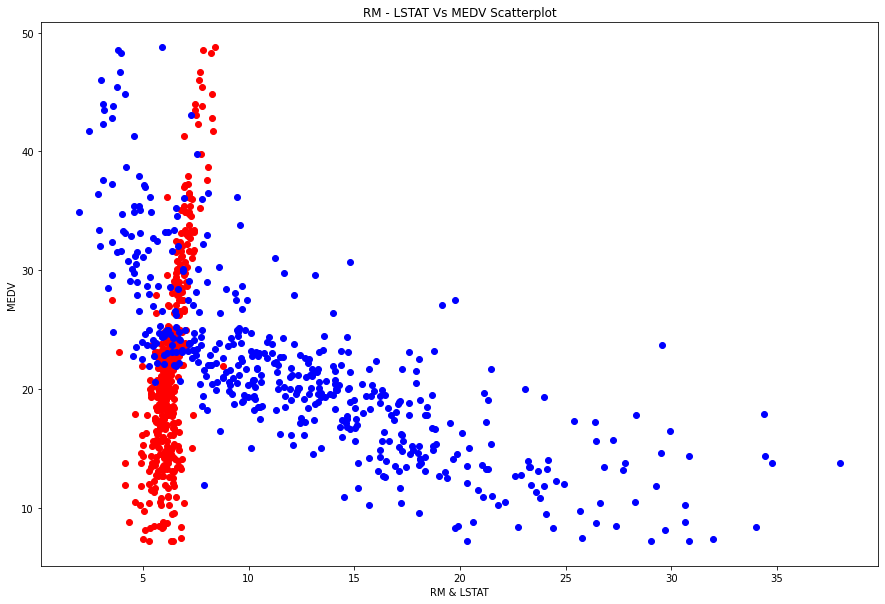

In [30]:
# Visualise combined (RM & LSTAT) Vs MEDV scatterplot
plt.figure(figsize=(15,10))
plt.scatter(df_filtered[['RM']], df_filtered[['MEDV']], c='red')
plt.scatter(df_filtered[['LSTAT']], df_filtered[['MEDV']], c='blue')
plt.xlabel('RM & LSTAT')
plt.ylabel('MEDV')
plt.title('RM - LSTAT Vs MEDV Scatterplot')

#Observation: Prices (MEDV) decreases as LSAT increases. The relationship appears
# quadratic.

### 6. Data Split for Training

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [32]:
# Train and test data shape
print(X_train.shape) # 80% data
print(X_test.shape)  # 20% data
print(y_train.shape) # 80% data
print(y_test.shape)  # 20% data

(387, 2)
(97, 2)
(387, 1)
(97, 1)


### 7. Modelling Data - Build Data Model

#### Modelling a linear regression

In [38]:
# Initialize an instance of Linear Regression model.
lm = LinearRegression(fit_intercept = True)  

In [39]:
# Fit the linear regression model to the data. Use 'X' and then 'y'.
model_lm = lm.fit(X_train, y_train)

In [40]:
# model coeffiencint
model_lm.coef_

array([[ 4.44314095, -0.56650951]])

In [41]:
# model intercept
model_lm.intercept_

array([1.41026681])

In [42]:
# Ask the model to predict.
# Pass the testing data which has the input values.
y_predictions_test_lm = model_lm.predict(X_test)
y_predictions_train_lm = model_lm.predict(X_train)

In [43]:
# Show test predictions
y_predictions_test_lm [0:10]

array([[29.5681827 ],
       [16.11595697],
       [25.56810133],
       [24.27700554],
       [19.93871041],
       [19.64376754],
       [24.79621314],
       [27.54298531],
       [19.3389876 ],
       [21.06393495]])

In [44]:
# Show train predictions
y_predictions_train_lm [0:10]

array([[18.76359542],
       [17.19313126],
       [19.10217072],
       [20.28516333],
       [22.10919381],
       [12.02293118],
       [13.7898588 ],
       [19.61690263],
       [21.0017346 ],
       [16.93336836]])

In [ ]:
# Show all test predictions
print(y_predictions_test_lm)
type(y_predictions_test_lm)

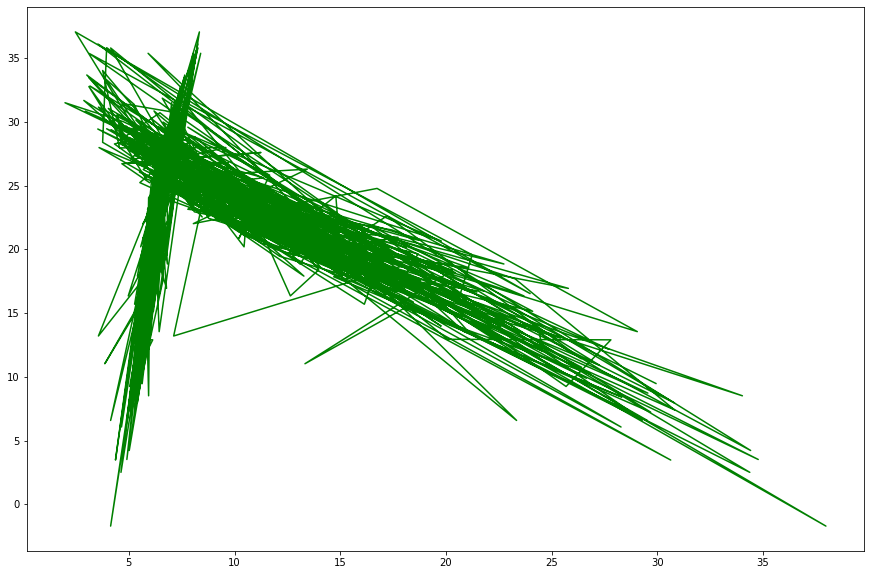

In [63]:
# Visualizing linear regression plot on predicted training data and comparing 
# it to scatter plot of original training data set.
plt.figure(figsize=(15,10))
plt.plot(X_train, y_predictions_train_lm, color="green", label="linear regression")
#plt.scatter(X_train, y_train, c='green')
plt.show()

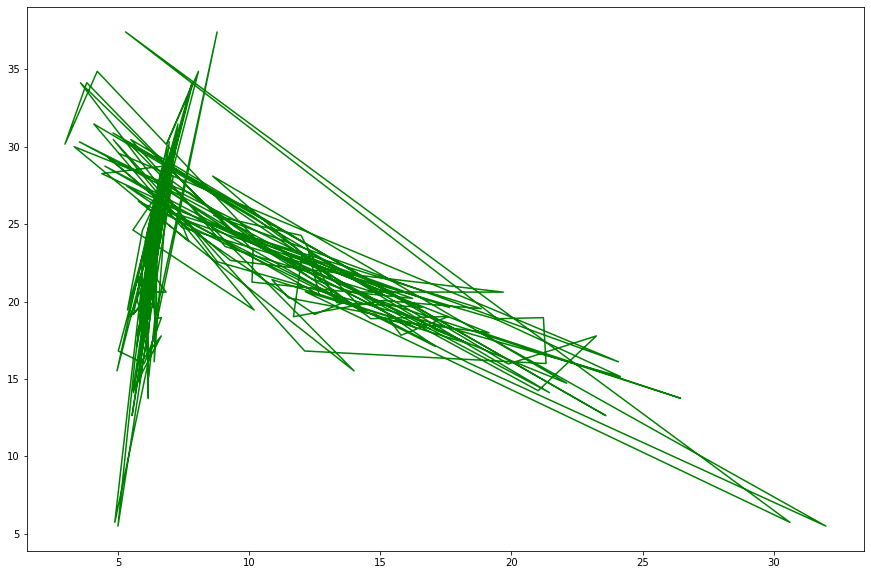

In [62]:
# Visualizing linear regression plot on predicted testing data and comparing 
# it to scatter plot of original testing data set.
plt.figure(figsize=(15,10))
plt.plot(X_test, y_predictions_test_lm, color="green", label="linear regression")
#plt.scatter(X_test, y_test, c='green')
plt.show()

#### Modelling polynomial regression

In [178]:
pm = PolynomialFeatures(degree = 2)
X_train_poly = pm.fit_transform(X_train)
X_test_poly = pm.fit_transform(X_test)
#model_pm = pm.fit(X_train_poly, y_train)

In [179]:
# Initialize an instance of Linear Regression model.
lm_pm = LinearRegression(fit_intercept = True)  

In [180]:
# Fit the linear regression model to the data. Use 'X_poly' and then 'y_train'.
model_lm_pm = lm_pm.fit(X_train_poly, y_train)

In [181]:
# model coeffiencint
model_lm_pm.coef_

array([[ 0.00000000e+00, -1.35254740e+01,  1.22887641e+00,
         1.70118344e+00, -3.14150136e-01,  9.10012937e-04]])

In [182]:
# model intercept
model_lm_pm.intercept_

array([47.62721714])

In [183]:
# Ask the model to predict.
# Pass the testing data which has the input values.
y_predictions_test_lm_pm = model_lm_pm.predict(X_test_poly)
y_predictions_train_lm_pm = model_lm_pm.predict(X_train_poly)

In [184]:
# Show test predictions
y_predictions_test_lm_pm [0:10]

array([[31.26684883],
       [12.43634488],
       [24.85903794],
       [22.86760753],
       [18.80782533],
       [17.53284158],
       [23.83958913],
       [27.79605292],
       [18.17217059],
       [19.46163472]])

In [185]:
# Show test predictions
y_predictions_train_lm_pm [0:10]

array([[17.73066821],
       [15.5537919 ],
       [18.17143453],
       [18.96185521],
       [20.55058373],
       [12.94274824],
       [12.35671606],
       [18.1698814 ],
       [19.52701686],
       [11.49496751]])

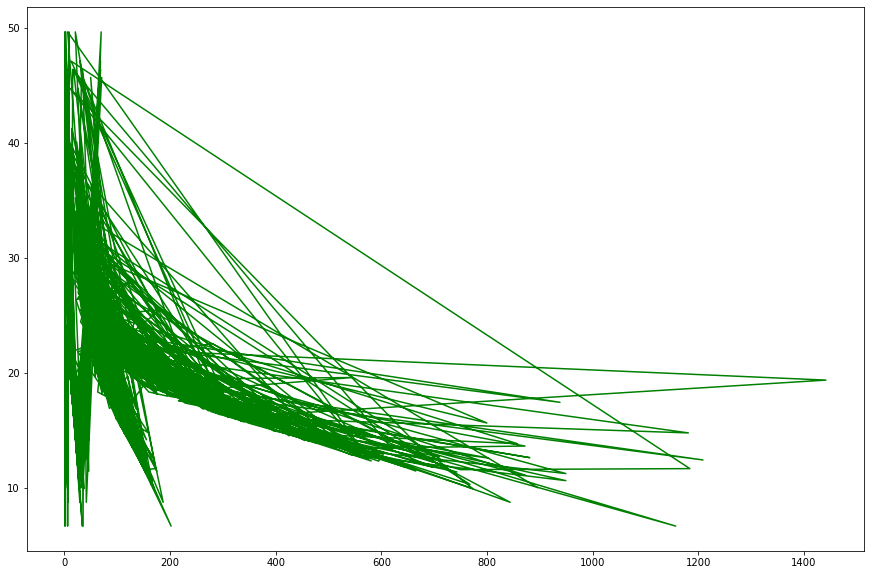

In [186]:
# Visualizing polynomial regression plot on predicted training data and comparing 
# it to scatter plot of original training data set.
plt.figure(figsize=(15,10))
plt.plot(X_train_poly, y_predictions_train_lm_pm, color="green", label="poly regression")
#plt.scatter(X_train, y_train, c='green')
plt.show()

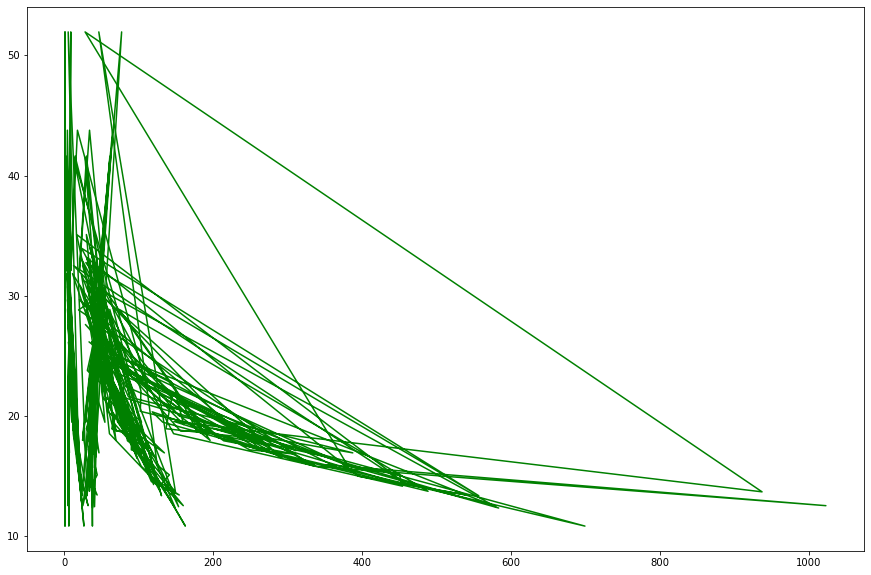

In [187]:
# Visualizing polynomial regression plot on predicted test data and comparing 
# it to scatter plot of original test data set.
plt.figure(figsize=(15,10))
plt.plot(X_test_poly, y_predictions_test_lm_pm, color="green", label="poly regression")
#plt.scatter(X_test, y_test, c='green')
plt.show()

### 8. Model Evaluation - polynomial model

In [188]:
# Coeffiencient of determination R^2 of the prediction from sklearn.
# Train data
print('The accuracy of the model on training data set is :', r2_score(y_train, y_predictions_train_lm_pm))

The accuracy of the model on training data set is : 0.7839719392261417


In [189]:
# Coeffiencient of determination R^2 of the prediction from sklearn.
# Test data
print('The accuracy of the model on training data set is :', r2_score(y_test, y_predictions_test_lm_pm))

The accuracy of the model on training data set is : 0.6768115819584919


In [190]:
#The R Square is measure of how close the data are to the fitted regression line.
# Our model explains 80% of the training data & 72% of the testing data.

In [191]:
print('The RMSE on training data set is :' ,np.sqrt(mean_squared_error(y_train, y_predictions_train_lm_pm)))

The RMSE on training data set is : 3.588914062549488


In [192]:
print('The RMSE on testing data set is :' ,np.sqrt(mean_squared_error(y_test, y_predictions_test_lm_pm)))

The RMSE on testing data set is : 4.343233084614287


In [ ]:
# The RMSE is the standard deviation of the residuals. Residuals is 
# the difference between the predicted value and the regression line. 
# Hence RMSE is a measure of how spread your residuals are.

# The Root Mean Squared Error measures the average error the model makes
# in predicting the outcome. Smaller the value of RMSE, better the model is.
# With high numbers, model needs to be improved.

In [193]:
# The mean absolute error (MAE) is the average of all the absolute errors. 
# The absolute error is the difference between the true value (y_train) 
# and the predicted value (y_pred).

# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_predictions_train_lm_pm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,y_predictions_test_lm_pm))

The MAE  on the training dataset is:  2.7670783743316694
The MAE  on the testing dataset is:  2.742815415840862


Text(0.5, 1.0, 'Actual Vs Predicted Values')

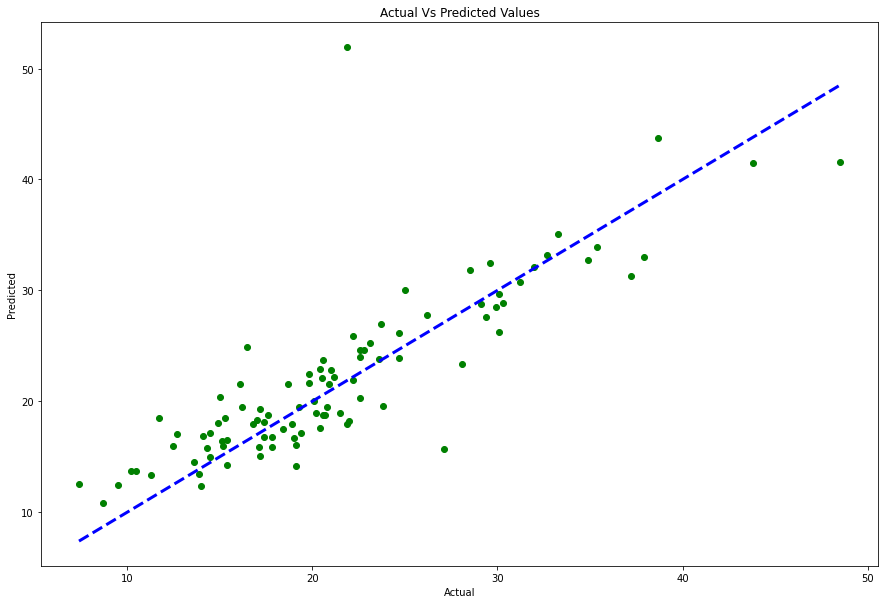

In [194]:
# Visualise train and test data using Scatter plot.
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predictions_test_lm_pm, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c='blue', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted Values')

C:\Users\Sagewood\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Predicted')

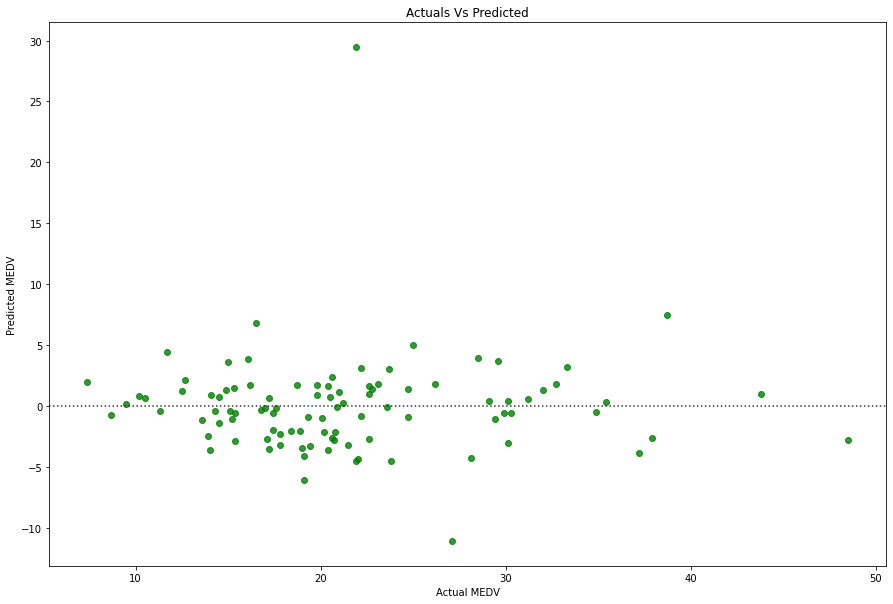

In [195]:
# Plotting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_test, y_predictions_test_lm_pm, color='green')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actuals Vs Predicted')

In [196]:
type(X_test) # Is an array. Pass the column name and convert into DataFrame.

numpy.ndarray

In [197]:
X_test.shape

(97, 2)

In [198]:
# Create a DataFrame to show actual Vs predicted values of our test data set.
avp_df = pd.DataFrame(X_test, columns = ['RM', 'LSTAT'])
avp_df['MEDV Actual'] = y_test
avp_df['MEDV Predicted'] = y_predictions_test_lm_pm
avp_df['Difference'] = y_test - y_predictions_test_lm_pm

In [199]:
# Show avp_df DataFrame
avp_df[0:20]

,RM,LSTAT,MEDV Actual,MEDV Predicted,Difference
0,6.980,5.04,37.2,31.266849,5.933151
1,6.380,24.08,9.5,12.436345,-2.936345
2,6.540,8.65,16.5,24.859038,-8.359038
3,6.674,11.98,21.0,22.867608,-1.867608
4,5.871,13.34,20.6,18.807825,1.792175
5,6.219,16.59,18.4,17.532842,0.867158
6,6.416,9.04,23.6,23.839589,-0.239589
7,6.718,6.56,26.2,27.796053,-1.596053
8,5.875,14.43,17.4,18.172171,-0.772171
9,6.137,13.44,19.3,19.461635,-0.161635


In [200]:
# Save acutal vs predicted DataFrame to a csv. 'r' is for raw data.
avp_df.to_csv(r'actual_vs_predicted.csv')

### 11. Deploy Model